In [1]:
#load necessary libraries 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [69]:
##load data

df=pd.read_csv('https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows

#df['tenure'].value_counts().sort_index()

pd.set_option('display.max_rows', 30)     # Show all rows


# 1. Framing problem 

### Exact problem:
    * Need to find out customer who are leaving the platform soon 
    * Main goal is to retain them as getting new customer is a very costly process(invloves lot of resources like prmotion,            discounts etc)
    * Prime customer and customer who left the platform are not our concern

### Convert business problem(increase revenue) to mathematical problem(reduce churn rate) 

### Who are my customer:
    * Individual Consumers having various facilities like PhoneService, InternetService, StreamingTV, StreamingMovies,                 DeviceProtection, Online backup etc

### Model is supervised or unsupervised:
    * we are finding customer churn (YES/NO) : Classification problem - supervised ML

### Where data is coming:
    * We will answer this later - (like data is coming from various tables from telecom dataset using join )

### End product visibility:
    * We will create an app which will accept customer data and let us know wheter customer is leaving or not

### Team Member Count: 3 

### End Goal: Reduce churn rate

# 2. Gathering data

### Data source:
    * Getting data from various tables using join
    * ...............
    *More points on this can be add later
    *................

# 3. Data preparation  

## Below steps need to be checked in data preparation stage

### 1. Data Cleaning 
    * Elimination of Duplicate rows
    * Handling Missing values in data
    * Check data structure issues to make sure each column is representing the correct datatype 
    * Outlier detection 


In [70]:
# Elimination of Duplicate rows
df.duplicated().sum()

0

In [71]:
#Handling Missing values in data
df.isnull().sum()

#TotalCharges column has some issues, it is containing blank string so this is not visible in null value check. 
#lets hadnle in below code.        

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
#Check data structure issues to make sure each column is representing the correct datatype and non empty values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [48]:
for col in df.select_dtypes('O').columns:
    df[col] = df[col].astype('category')
#currenly convert gender to category 

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   category
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

### Column looks okay as per current datatype  except TotalCharges  - it should be float 

In [10]:
#df['TotalCharges'].astype(float)

#We are getting error as it is conataining spaces i.e empty string , which is need to be fixed.

#### Getting error in changing value from string to float - ValueError: could not convert string to float: ' '


### Scanning all str and numerical columns for white space 

### STR columns

In [72]:
#AttributeError: 'int' object has no attribute 'strip'
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


### Numerical Columns

In [73]:
#For the int and float value if they are containing space use below:
for col in df.select_dtypes(include=['int','float']).columns:
    print(col,"having space character:",df['SeniorCitizen'].astype(str).str.contains(r'\s').any())


SeniorCitizen having space character: False
tenure having space character: False
MonthlyCharges having space character: False


In [74]:
(df == '').any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

#### If we have string with blanks charcter in dataset then we have to apply strip first to object colum and then use .any() function to get the empty string in df . initially it was not visible in dataframe using null value

#### So Total charges column has empty string. found data and got that customer are joined in this month.

In [75]:
df[df['TotalCharges']== '']

#total charges for below customer need to be update to 0 as thay have just joined.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


### Total charges column is now fixed with empty string and empty string replaced by 0 as customer just joined


In [76]:
df['TotalCharges'].replace('',np.nan,inplace=True)
df['TotalCharges'].fillna(0,inplace=True)
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [77]:
df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7043 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


### Outlier detection - no Outlier in dataset 

<AxesSubplot: >

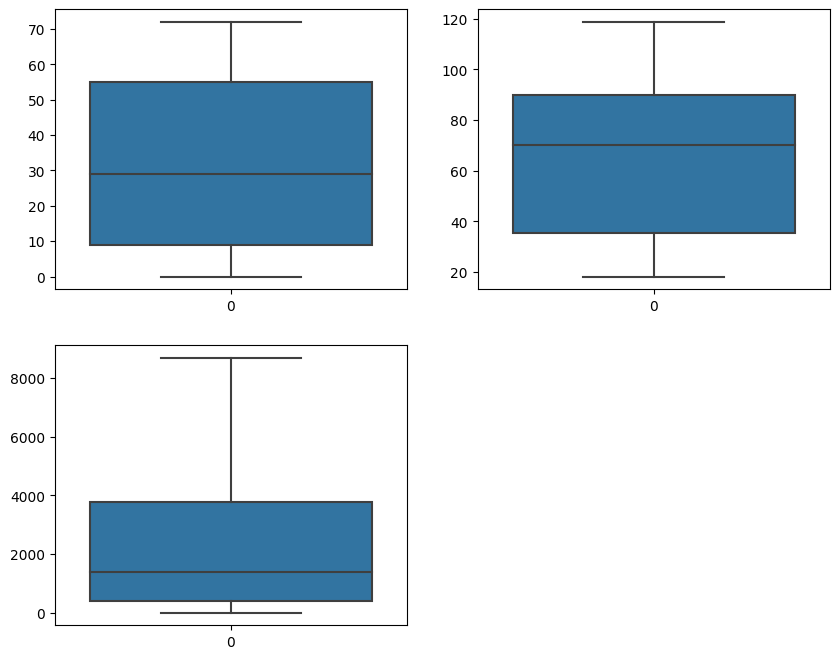

In [17]:
#Outlier detection 

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.boxplot(df['tenure'])

plt.subplot(2,2,2)
sns.boxplot(df['MonthlyCharges'])

plt.subplot(2,2,3)
sns.boxplot(df['TotalCharges'])




# 3. Explore and Visualize the Data

### How big is you dataset 

In [18]:
df.shape
#Data contain 7043 rows and 21 columns 

(7043, 21)

### Statistical techniques in EDA

#### check the percentage and frequency of categorical columns

In [24]:
df.describe(include='O')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


### Add Frequency % for each categorical columns

In [26]:
desc_cat=df.describe(include='O')
desc_cat

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [27]:
row=desc_cat.iloc[0:4:3]
row

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [28]:
column_percentages = row.iloc[1] / row.iloc[0] * 100


In [29]:
column_percentages

customerID           0.014198
gender               50.47565
Partner              51.69672
Dependents          70.041176
PhoneService        90.316626
MultipleLines       48.132898
InternetService      43.95854
OnlineSecurity      49.666335
OnlineBackup        43.844952
DeviceProtection    43.944342
TechSupport         49.311373
StreamingTV         39.897771
StreamingMovies     39.542808
Contract            55.019168
PaperlessBilling    59.221922
PaymentMethod       33.579441
Churn               73.463013
dtype: object

In [30]:
desc_cat = desc_cat.append(column_percentages,ignore_index=True)
new_index= ['count', 'unique', 'top', 'freq','freq_%']
desc_cat.index=new_index
desc_cat

C:\Users\rupeshv\AppData\Local\Temp\ipykernel_12140\3033474627.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  desc_cat = desc_cat.append(column_percentages,ignore_index=True)


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174
freq_%,0.014198,50.47565,51.69672,70.041176,90.316626,48.132898,43.95854,49.666335,43.844952,43.944342,49.311373,39.897771,39.542808,55.019168,59.221922,33.579441,73.463013


### freq_% can tell us a lot of things regaridng our univariate categorical varuiables like their disribution and % of area occupied 

* 90% people are using phone service. (majority)
* male and female ratio is 

In [31]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


* Senior citizen column is categorical column(0 and 1)
* Teure is the customer usage period. Min value: 0 (newly customer), Max value: 72 month, Avg is 29 months
* Montly charges, package start from 18.25 dollar and max montly charges is 118.75 which is possibly a combination of multiple services, avg changes 70 dollars
* Total charges  - is the payment paid so far by employees (0 new joiner and 8684 is max and 1394 is avg

In [38]:
df.select_dtypes(include='O').columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [40]:
plt.figure(figsize=(16,8))
for i,col in enumerate(df.select_dtypes(include='O').columns):
    print(i,col)

0 customerID
1 gender
2 Partner
3 Dependents
4 PhoneService
5 MultipleLines
6 InternetService
7 OnlineSecurity
8 OnlineBackup
9 DeviceProtection
10 TechSupport
11 StreamingTV
12 StreamingMovies
13 Contract
14 PaperlessBilling
15 PaymentMethod
16 Churn


<Figure size 1600x800 with 0 Axes>

C:\Users\rupeshv\AppData\Local\Temp\ipykernel_12140\3529077057.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.select_dtypes(exclude = 'object').hist(ax=ax,bins=20)


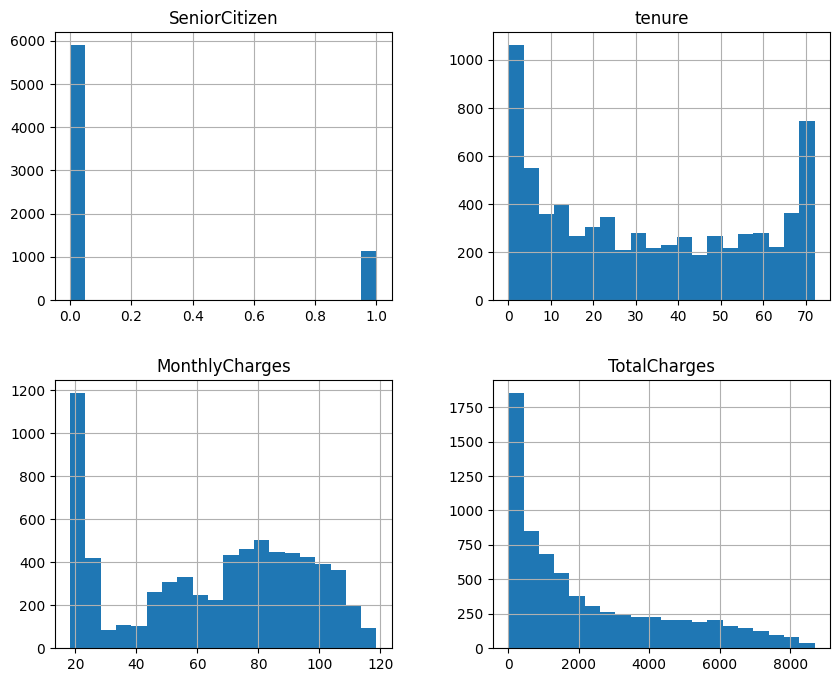

In [57]:
fig, ax = plt.subplots(figsize=(10,8))

df.select_dtypes(exclude = 'object').hist(ax=ax,bins=20)
plt.show()

In [90]:
df.select_dtypes(include='O').columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

# univariate 

<AxesSubplot: ylabel='PaymentMethod'>

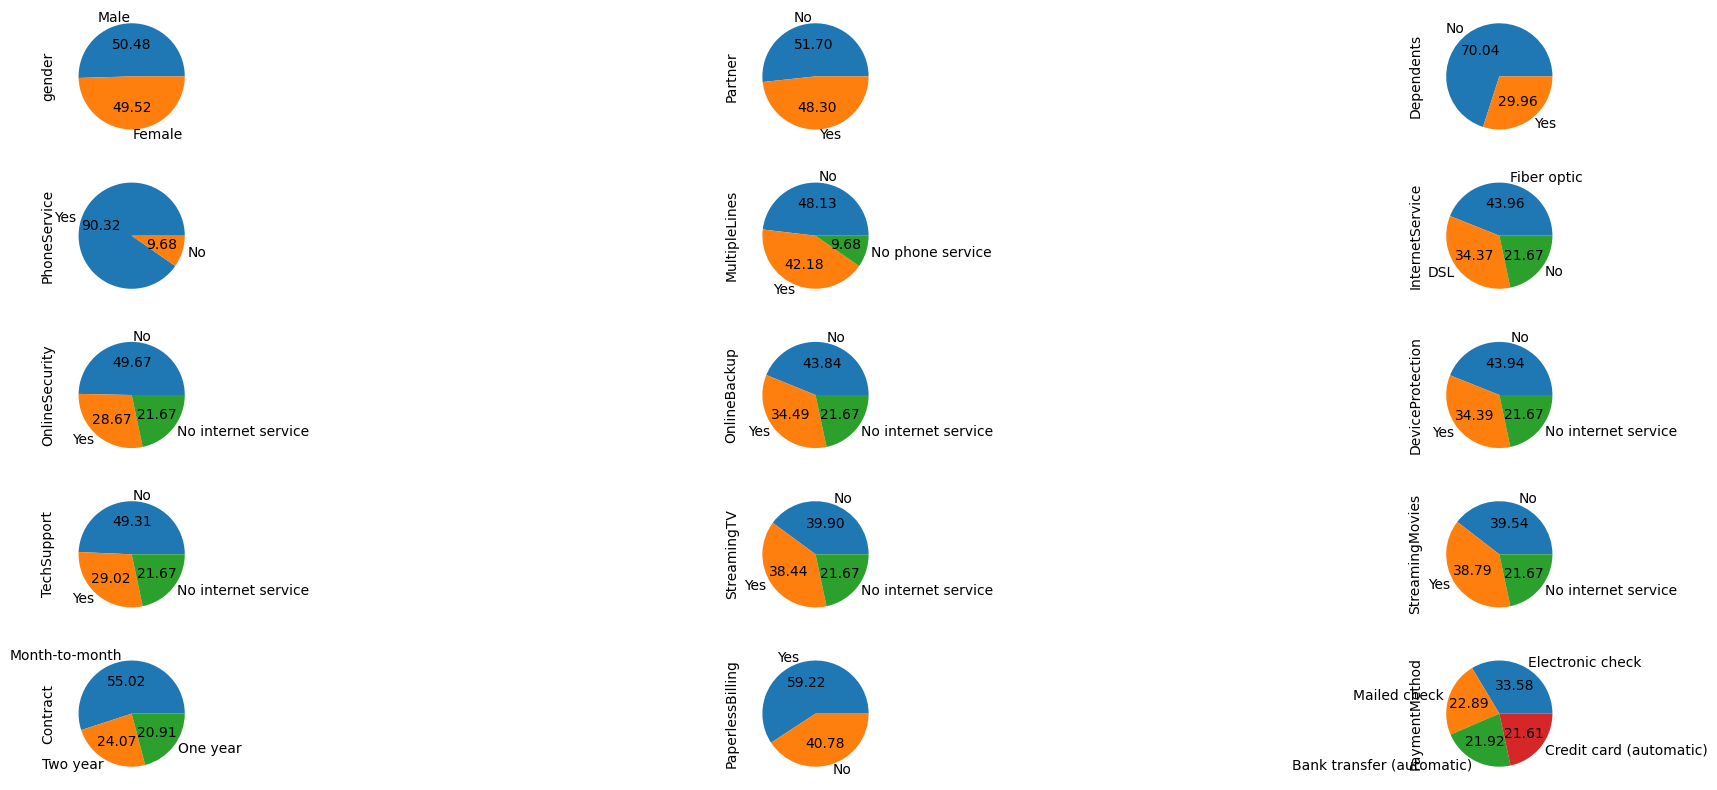

In [96]:
plt.figure(figsize=(25,10))
plt.subplot(5,3,1)
df['gender'].value_counts().plot(kind='pie',autopct='%.2f')

plt.subplot(5,3,2)
df['Partner'].value_counts().plot(kind='pie',autopct='%.2f')

plt.subplot(5,3,3)
df['Dependents'].value_counts().plot(kind='pie',autopct='%.2f')

plt.subplot(5,3,4)
df['PhoneService'].value_counts().plot(kind='pie',autopct='%.2f')

plt.subplot(5,3,5)
df['MultipleLines'].value_counts().plot(kind='pie',autopct='%.2f')

plt.subplot(5,3,6)
df['InternetService'].value_counts().plot(kind='pie',autopct='%.2f')

plt.subplot(5,3,7)
df['OnlineSecurity'].value_counts().plot(kind='pie',autopct='%.2f')

plt.subplot(5,3,8)
df['OnlineBackup'].value_counts().plot(kind='pie',autopct='%.2f')

plt.subplot(5,3,9)
df['DeviceProtection'].value_counts().plot(kind='pie',autopct='%.2f')

plt.subplot(5,3,10)
df['TechSupport'].value_counts().plot(kind='pie',autopct='%.2f')

plt.subplot(5,3,11)
df['StreamingTV'].value_counts().plot(kind='pie',autopct='%.2f')

plt.subplot(5,3,12)
df['StreamingMovies'].value_counts().plot(kind='pie',autopct='%.2f')


plt.subplot(5,3,13)
df['Contract'].value_counts().plot(kind='pie',autopct='%.2f')

plt.subplot(5,3,14)
df['PaperlessBilling'].value_counts().plot(kind='pie',autopct='%.2f')

plt.subplot(5,3,15)
df['PaymentMethod'].value_counts().plot(kind='pie',autopct='%.2f')



# Bivariate

In [102]:
pd.crosstab(df['gender'],[df['Partner'],df['Dependents']])

Partner       No       Yes     
Dependents    No  Yes   No  Yes
gender                         
Female      1655  145  805  883
Male        1625  216  848  866

In [111]:
print(1655/7043*100 ,"Female and", 1625/7043*100 ,"male are single")

print("Male having dependents are", 216/7043*100)
print("Female having dependents are", 145/7043*100)

print("Male not having dependents but having partner are", 848/7043*100)
print("Female not having dependents but having partner are", 805/7043*100)

print("Male having dependents and having partner are", 866/7043*100)
print("Female having dependents and having partner are", 883/7043*100)


23.49850915802925 Female and 23.07255430924322 male are single
Male having dependents are 3.0668749112594065
Female having dependents are 2.058781769132472
Male not having dependents but having partner are 12.040323725685077
Female not having dependents but having partner are 11.429788442425103
Male having dependents and having partner are 12.295896634956694
Female having dependents and having partner are 12.537271049268778


# new feature can developed  - single or family 

In [105]:
pd.crosstab(df['PhoneService'],df['MultipleLines'])

MultipleLines,No,No phone service,Yes
PhoneService,,,
No,0,682,0
Yes,3390,0,2971


In [113]:
print(3390/7043*100 , "people are going for only phone service with single line")
print(2971/7043*100 , "people are going for phone service with multiple lines")


48.13289791282124 people are going for only phone service with single line
42.18372852477638 people are going for phone service with multiple lines


In [112]:
pd.crosstab(df['PhoneService'],df['InternetService'])

InternetService,DSL,Fiber optic,No
PhoneService,,,
No,682,0,0
Yes,1739,3096,1526


In [118]:
print(682/7043*100, "No phone service but DSL only ")
print(1739/7043*100 , "phone service with DSL")
print(3096/7043*100, "phone service with fiber optic")
print(1526/7043*100 , "phone service with no internet service")

9.683373562402386 No phone service but DSL only 
24.69118273463013 phone service with DSL
43.958540394718156 phone service with fiber optic
21.666903308249324 phone service with no internet service


In [119]:
pd.crosstab(df['PhoneService'],df['OnlineSecurity'])

OnlineSecurity,No,No internet service,Yes
PhoneService,,,
No,399,0,283
Yes,3099,1526,1736


In [120]:
print(399/7043*100,  "No phone service and no online security")
print(283/7043*100, "No phone service and  online security")

5.6651994888541815 No phone service and no online security
4.018174073548204 No phone service and  online security


# lets explore data without phone services:

In [121]:

df [df['PhoneService']=='No']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,4501-VCPFK,Male,0,No,No,26,No,No phone service,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Electronic check,35.75,1022.50,No
7007,2274-XUATA,Male,1,Yes,No,72,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),63.10,4685.55,No
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.30,No


<AxesSubplot: xlabel='MonthlyCharges', ylabel='Density'>

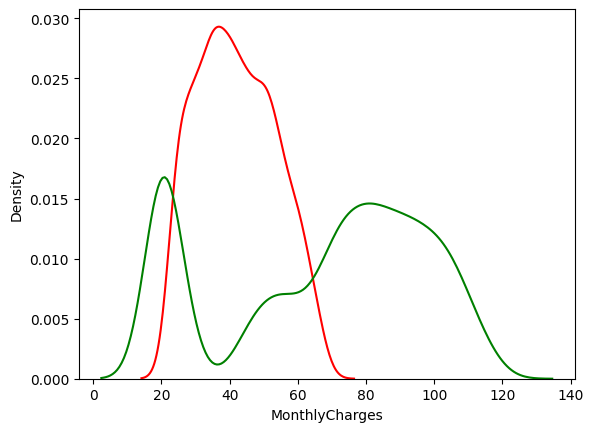

In [124]:
sns.kdeplot(df[df['PhoneService']=='No']['MonthlyCharges'],color='red')
sns.kdeplot(df[df['PhoneService']=='Yes']['MonthlyCharges'],color='green')


In [126]:
df [df['PhoneService']=='No'].describe(include='O')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682
unique,682,2,2,2,1,1,1,2,2,2,2,2,2,3,2,4,2
top,7590-VHVEG,Male,No,No,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,351,371,476,682,682,682,399,395,377,393,397,384,376,387,226,512


In [134]:
df [df['PhoneService']=='No']['Churn'].value_counts()

No     512
Yes    170
Name: Churn, dtype: int64

In [136]:
pd.crosstab(df['OnlineSecurity'],df['OnlineBackup'])

OnlineBackup,No,No internet service,Yes
OnlineSecurity,,,
No,2195,0,1303
No internet service,0,1526,0
Yes,893,0,1126


In [247]:
print(2195/7043*100,"people donot need onlinr backup and online security")

31.165696436177765 people donot need onlinr backup and online security


In [ ]:
df['MonthlyCharges'].value_counts().head(100).plot(kind='bar')

<AxesSubplot: >

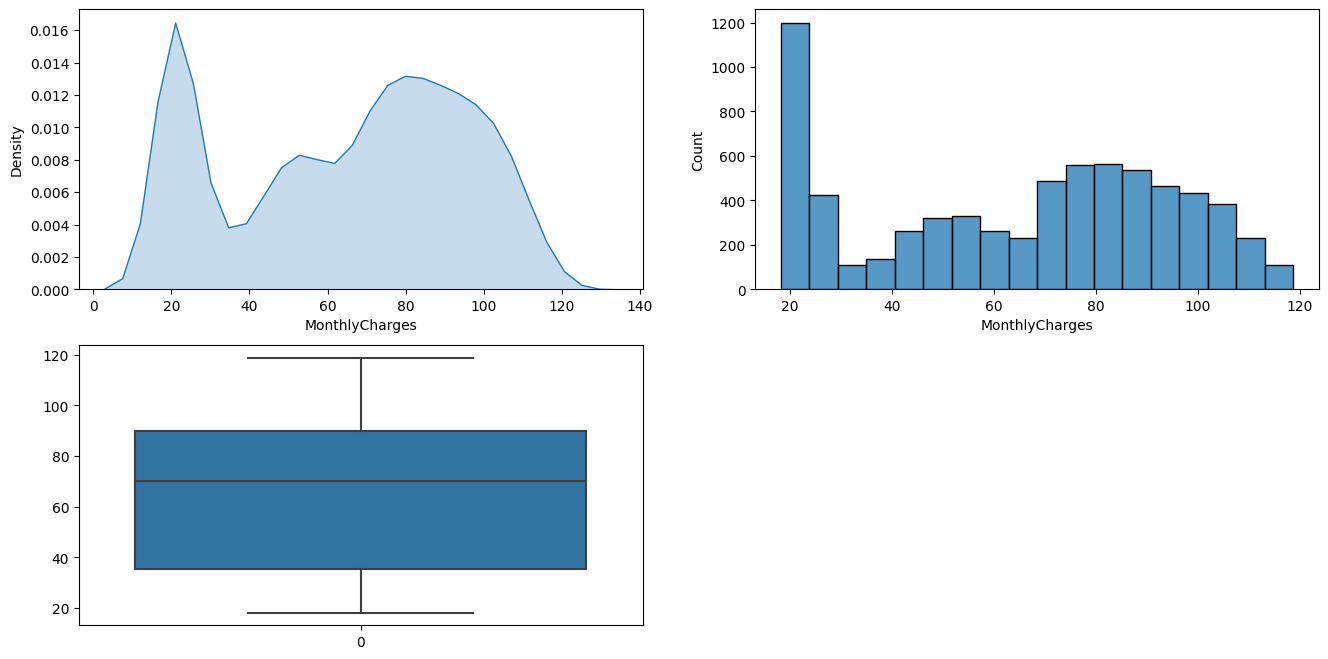

In [155]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.kdeplot(df['MonthlyCharges'],fill=True,levels=5,gridsize=30)

plt.subplot(2,2,2)
sns.histplot(df['MonthlyCharges'],stat='count')

plt.subplot(2,2,3)
sns.boxplot(df['MonthlyCharges'])

## Churn vs Monthly charges 

C:\Users\rupeshv\AppData\Local\Temp\ipykernel_12140\2844084512.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Churn']=='Yes']['MonthlyCharges'],label='Yes',color='RED',hist=False)
C:\Users\rupeshv\AppData\Local\Temp\ipykernel_12140\2844084512.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5

<AxesSubplot: xlabel='MonthlyCharges'>

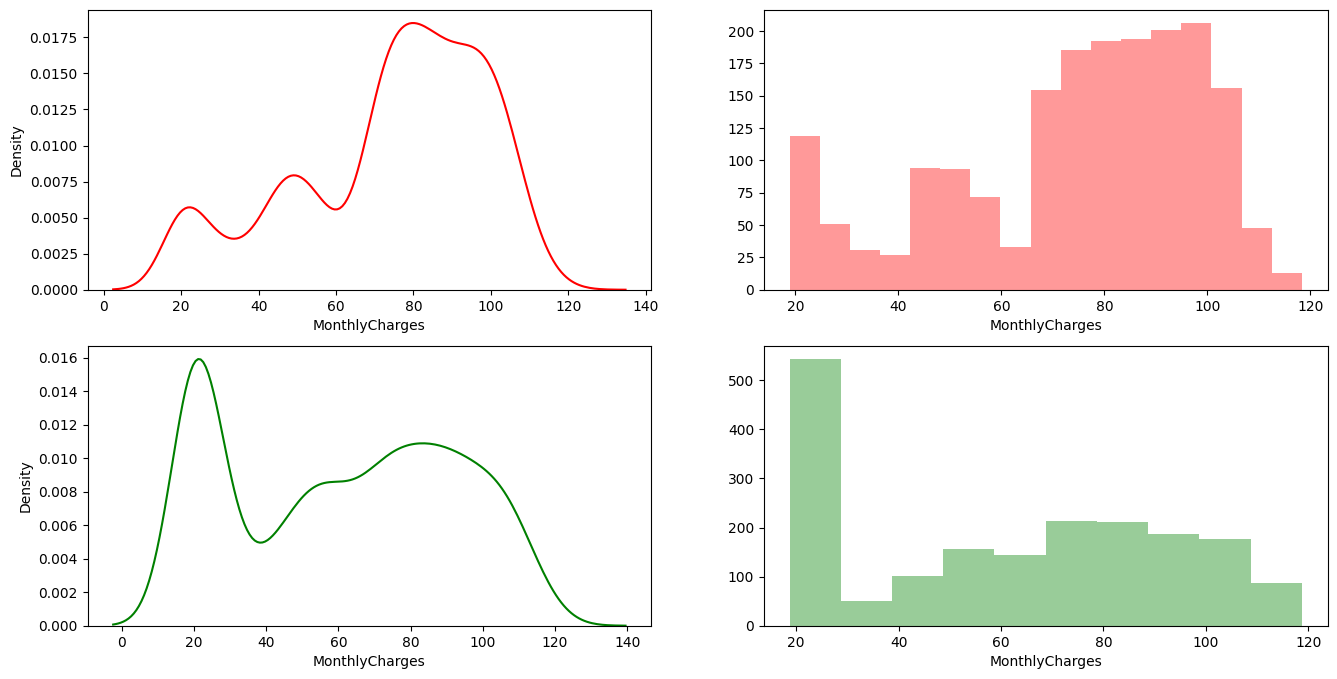

In [231]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df[df['Churn']=='Yes']['MonthlyCharges'],label='Yes',color='RED',hist=False)

plt.subplot(2,2,2)
sns.distplot(df[df['Churn']=='Yes']['MonthlyCharges'],label='Yes',color='RED',hist=True,kde=False)

plt.subplot(2,2,3)
sns.distplot(df[df['Churn']=='No']['MonthlyCharges'].sample(1869),label='No',color='GREEN',hist=False)

plt.subplot(2,2,4)
sns.distplot(df[df['Churn']=='No']['MonthlyCharges'].sample(1869),label='No',color='GREEN',hist=True,kde=False)

## Churn vs tenure

C:\Users\rupeshv\AppData\Local\Temp\ipykernel_12140\17369274.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Churn']=='Yes']['tenure'],label='Yes',color='RED',hist=False)
C:\Users\rupeshv\AppData\Local\Temp\ipykernel_12140\17369274.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

<AxesSubplot: xlabel='tenure'>

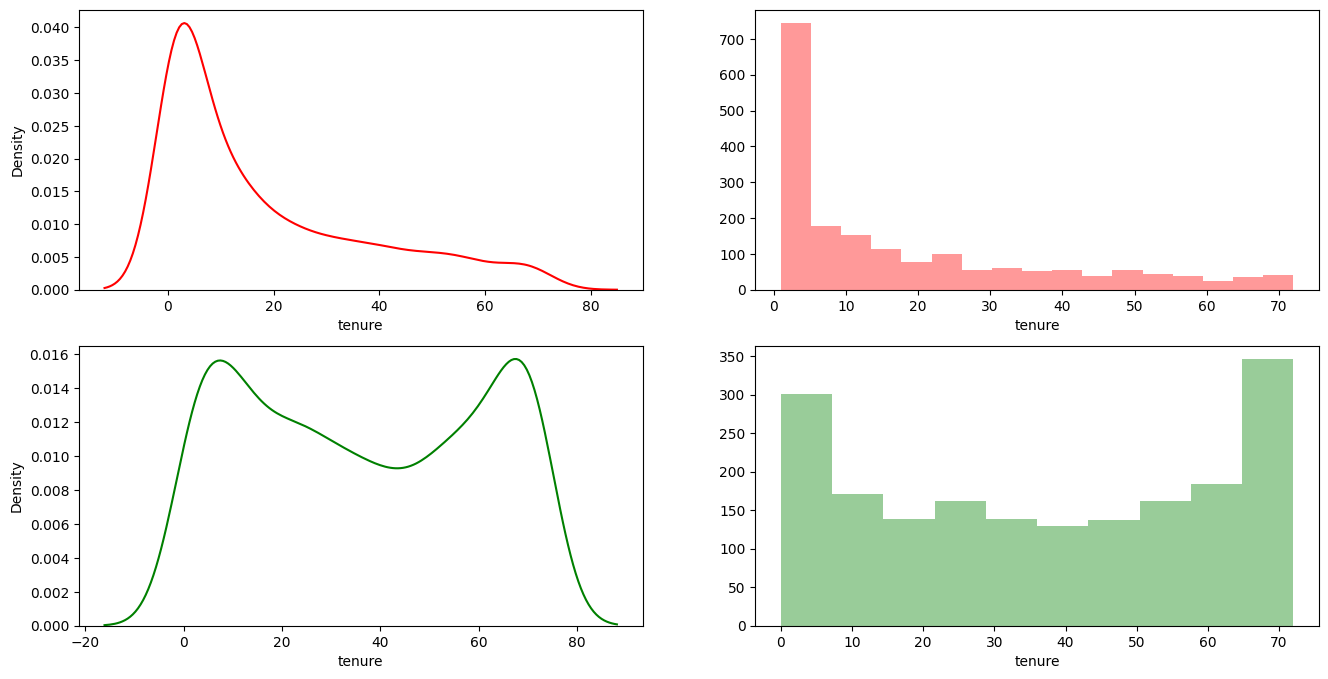

In [200]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df[df['Churn']=='Yes']['tenure'],label='Yes',color='RED',hist=False)

plt.subplot(2,2,2)
sns.distplot(df[df['Churn']=='Yes']['tenure'],label='Yes',color='RED',hist=True,kde=False)

plt.subplot(2,2,3)
sns.distplot(df[df['Churn']=='No']['tenure'].sample(1869),label='No',color='GREEN',hist=False)

plt.subplot(2,2,4)
sns.distplot(df[df['Churn']=='No']['tenure'].sample(1869),label='No',color='GREEN',hist=True,kde=False)


In [253]:
pd.crosstab(df['Churn'],df['tenure'])

tenure,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72
Churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
No,11,233,115,106,93,69,70,80,81,73,71,68,79,71,52,62,52,61,73,54,53,46,63,72,71,56,64,59,45,57,56,49,50,50,53,73,40,50,46,42,51,56,51,50,45,55,62,54,55,51,58,60,72,56,55,55,70,57,56,52,70,68,65,68,76,67,76,88,91,87,108,164,356
Yes,0,380,123,94,83,64,40,51,42,46,45,31,38,38,24,37,28,26,24,19,18,17,27,13,23,23,15,13,12,15,16,16,19,14,12,15,10,15,13,14,13,14,14,15,6,6,12,14,9,15,10,8,8,14,13,9,10,8,11,8,6,8,5,4,4,9,13,10,9,8,11,6,6


* Out of total churn % i.e 26% , 10% are churning in first 5 month and more than 5 % churn in first month
* May be these person join  to avail the discount offered

* or may be there is any service problem in that location  - need to check with them 

* This is not good that new customer are leaving into the system - because to make new customer lot of effort needed(money involved)
* Need to find the cause for this
* These are not our loyal customer - but with our effort we can make them as loyal


## Churn vs tenure vs Montly charges 


<AxesSubplot: xlabel='MonthlyCharges', ylabel='tenure'>

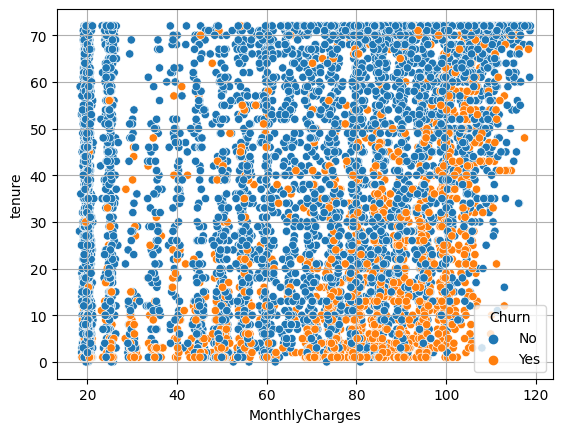

In [249]:
plt.grid('True')
sns.scatterplot(data=df,x='MonthlyCharges',y='tenure',hue='Churn')


* Major churn population is having monntly charges b/w 70 and 105
* Below 5 month, more people are churning , in first month itself 5% population churn  
* It is clear that people who are churning are using combination of services as their montly charges are in range 70 and 105


In [138]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot: >

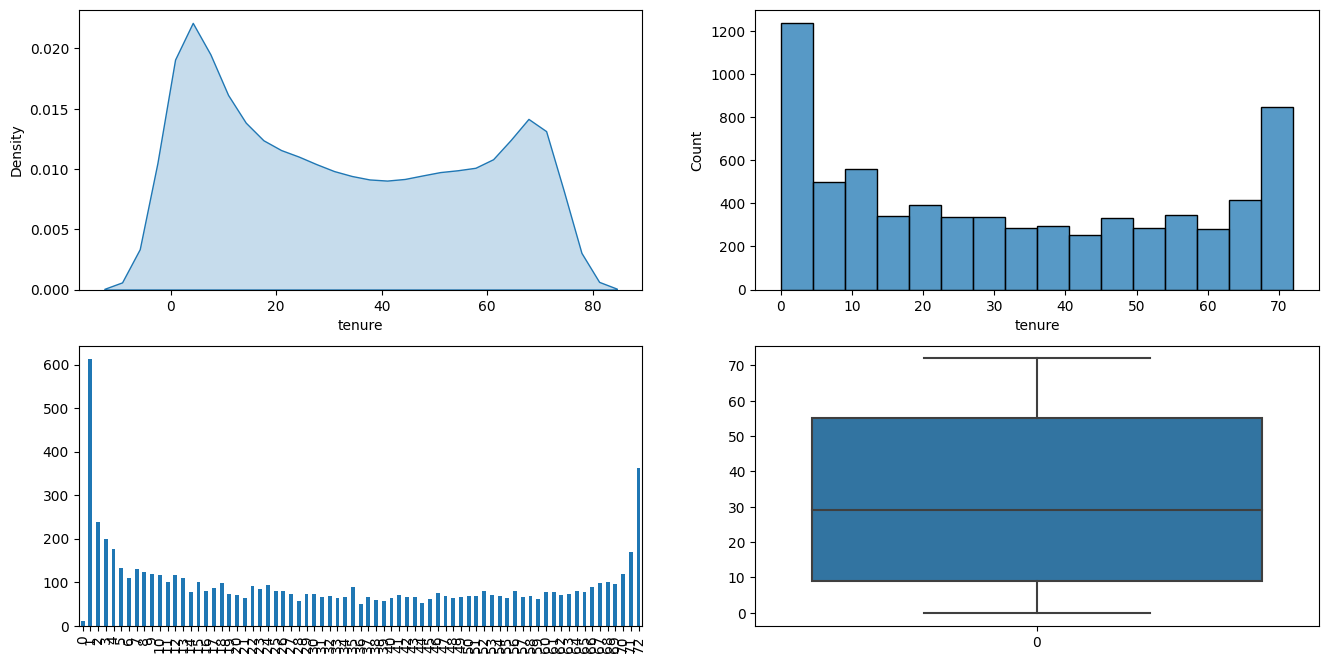

In [139]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.kdeplot(df['tenure'],fill=True,levels=5,gridsize=30)

plt.subplot(2,2,2)
sns.histplot(df['tenure'],stat='count')

plt.subplot(2,2,3)
df['tenure'].value_counts().sort_index().plot(kind='bar')

plt.subplot(2,2,4)
sns.boxplot(df['tenure'])



In [177]:
df['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [287]:
print(1393/7043*100,"% Non senior citizen are churned" , 476/7043*100 ,"% senior citizen are churned")

19.778503478631265 % Non senior citizen are churned 6.758483600738321 % senior citizen are churned


In [289]:
pd.crosstab(df['Churn'],[df['SeniorCitizen'],df['gender']])

SeniorCitizen      0            1     
gender        Female  Male Female Male
Churn                                 
No              2221  2287    328  338
Yes              699   694    240  236

## Gender vs SeniorCitizen vs Tenure vs Churn

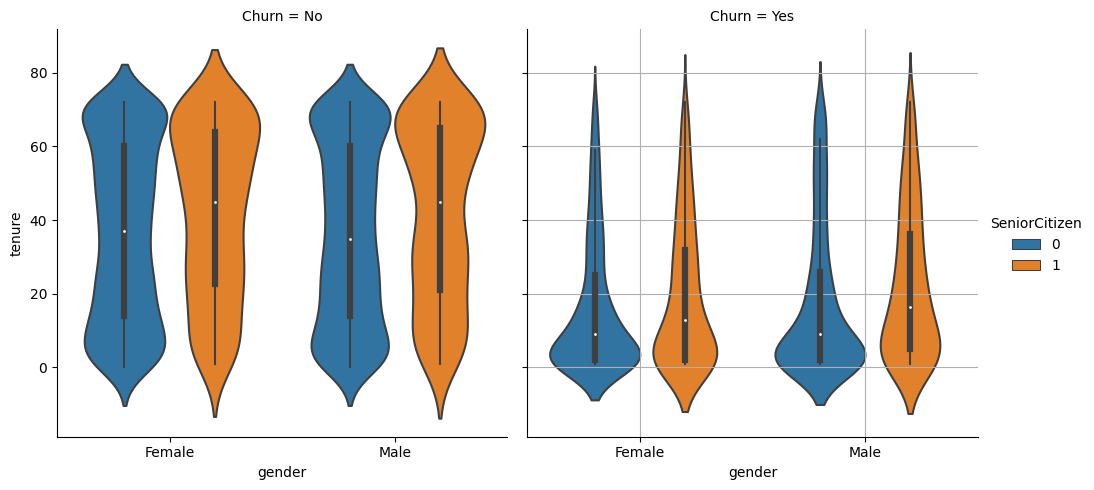

In [314]:

sns.catplot(data=df,x='gender',y='tenure',kind='violin',hue='SeniorCitizen',col='Churn')
plt.grid('True')

## Churn = Yes
* People are generally chruning in the initial months. showing high density distribution as per data points 


## Churn = No
* People are joining in the intial months
* we also see loyal customer in between 60 and 70
* avg tenure duration in Senior male and female  is more as compare to Non sennior male and female  

## Churn Trend 

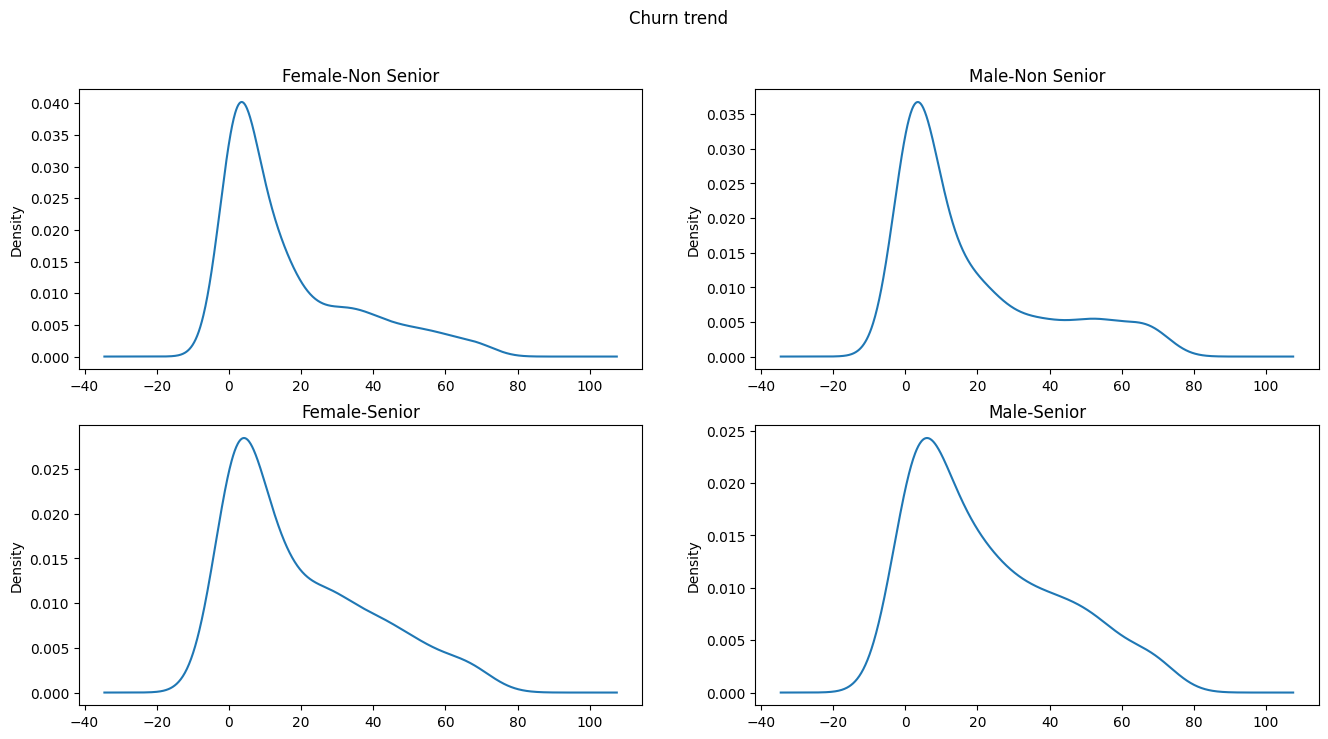

In [340]:

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
df.loc[(df['gender']=='Female') & (df['SeniorCitizen'] ==0) & (df['Churn']=='Yes')]['tenure'].plot(kind='kde',title='Female-Non Senior')

plt.subplot(2,2,2)
df.loc[(df['gender']=='Male') & (df['SeniorCitizen'] ==0) & (df['Churn']=='Yes')]['tenure'].plot(kind='kde',title='Male-Non Senior')

plt.subplot(2,2,3)
df.loc[(df['gender']=='Female') & (df['SeniorCitizen'] ==1) & (df['Churn']=='Yes')]['tenure'].plot(kind='kde',title='Female-Senior')

plt.subplot(2,2,4)
df.loc[(df['gender']=='Male') & (df['SeniorCitizen'] ==1) & (df['Churn']=='Yes')]['tenure'].plot(kind='kde',title='Male-Senior')


plt.suptitle('Churn trend')


plt.show()



* as per Male-Non Senior  -showing churn in tenture from 65 to 71 month - these were the loyal customer who churn and we must retain those customers. Need to contact them for their problems
* people are slowly churn after 20 months

In [492]:
#pd.crosstab(df['tenure'],[df['Churn'],df['SeniorCitizen'],df['gender']])

In [322]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Churn vs SeniorCitizen vs gender vs Partner vs Dependents

In [431]:
pd.crosstab([df['Churn'],df['SeniorCitizen'],df['gender']],[df['Partner'],df['Dependents']])

Partner                      No       Yes     
Dependents                   No  Yes   No  Yes
Churn SeniorCitizen gender                    
No    0             Female  909  110  482  720
                    Male    963  168  439  717
      1             Female  159    2  136   31
                    Male    126    4  176   32
Yes   0             Female  429   32  114  124
                    Male    418   43  128  105
      1             Female  158    1   73    8
                    Male    118    1  105   12

* people are churning more who does not have partner or dependents  as compared to other conditions
* Young mail and female are more churning  -who do not have partner and dependents 

In [491]:
#pd.crosstab(df['tenure'],[df['Churn'],df['SeniorCitizen'],df['gender'],df['Partner'],df['Dependents']])

* In last 72 month tenure  - people are more in number who have dependent and partner 
* In last 72 month tenure - people are less than above point but more than 50 - who have partner only - couple 
* Both above person are not senior citizen 

## Contract vs tenure 

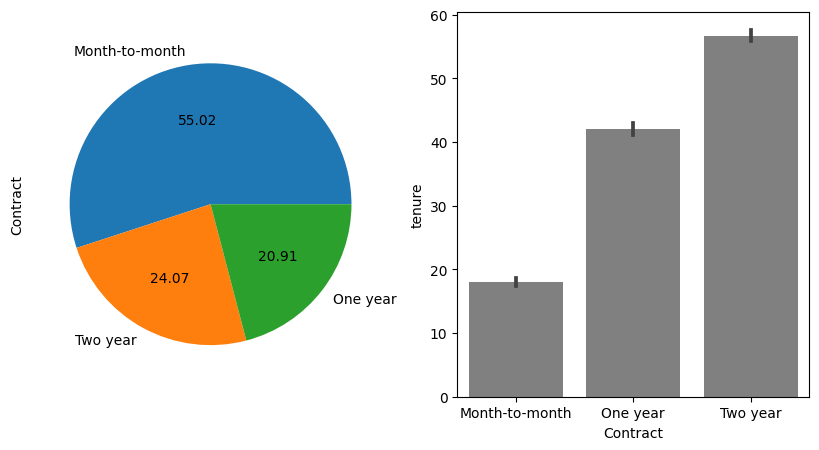

In [426]:

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
df['Contract'].value_counts().plot(kind='pie',autopct='%.2f')



plt.subplot(1,2,2)
#sns.catplot(data=df,x='Contract',y='tenure',kind='bar')
#plt.bar(x='Contract',height='tenure',data=df)
sns.barplot(data=df,x='Contract',y='tenure',color='Grey')

plt.show()

* From above pie chart  - Month to month contract people are than 50%
* But seeing contract with tenure  - Month to month person stay on an average 18month
* one year and two year stay for long time in system




## PaymentMethod vs tenure

In [412]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

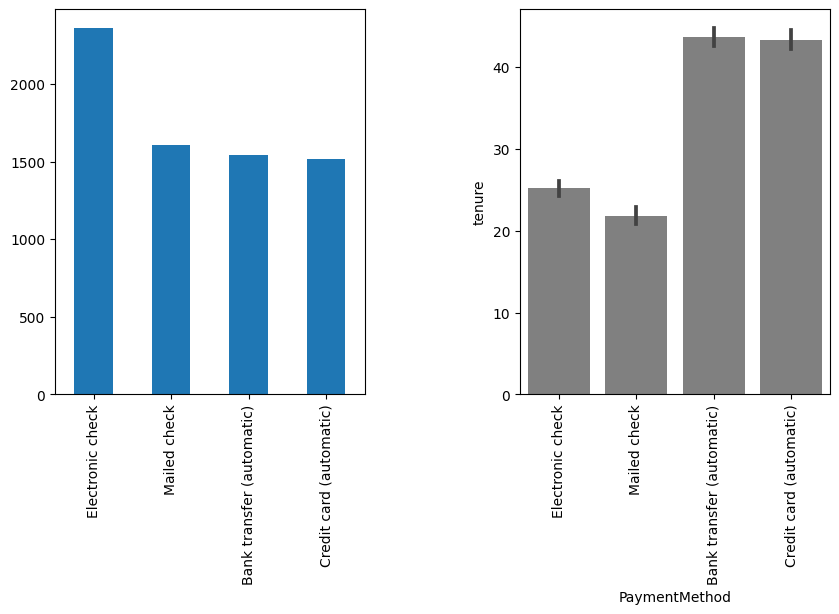

In [425]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.subplot(1,2,1)
df['PaymentMethod'].value_counts().plot(kind='bar')


plt.subplot(1,2,2)
plt.xticks(rotation='vertical')

sns.barplot(data=df,x='PaymentMethod',y='tenure',color='grey')

plt.show()

* People paying payment using electronic check are more in number but stay for less tenure 
* Bank transfer automatic and credit card automatic stay more in tenure

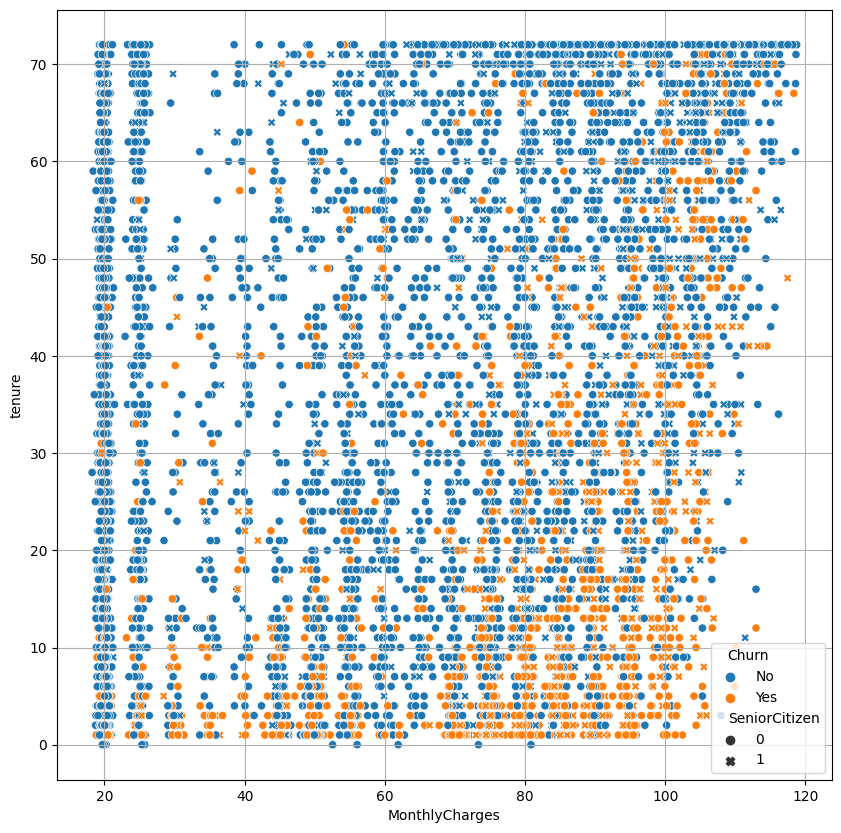

In [436]:
plt.figure(figsize=(10,10))
plt.grid('True')
sns.scatterplot(data=df,x='MonthlyCharges',y='tenure',hue='Churn',style='SeniorCitizen')

plt.show()

* We checked that people having phone service are coming in scatter plot in the begnining vertical line 
* look like People are joining operator with varying charges with some discount 
* We checked that people joining with one year and  two year contract  - getting less charges as compared to month to month
* We checked that people with 1 month tenure and monthly charges in range 70 to 80 where  using phone service and Fiber optic
* So need to check that is there any issue with fibre optic in that area

In [437]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [490]:
#df.loc[(df['MonthlyCharges']>65) & (df['MonthlyCharges']<110) & (df['tenure']<2) & (df['Churn']=='Yes')]

<AxesSubplot: xlabel='MonthlyCharges', ylabel='Density'>

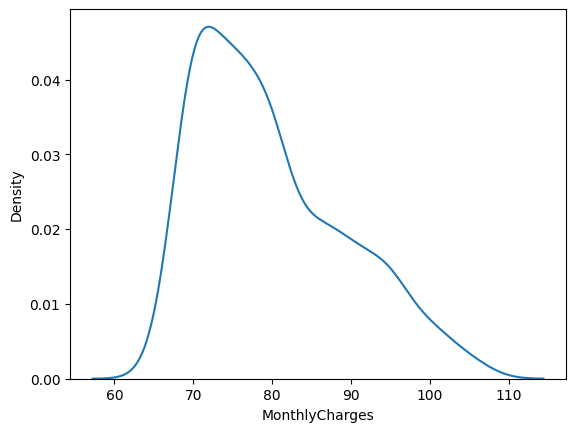

In [471]:
sns.kdeplot(df.loc[(df['MonthlyCharges']>65) & (df['MonthlyCharges']<110) & (df['tenure']<5) & (df['Churn']=='Yes')]['MonthlyCharges'])

In [473]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## TotalCharges vs tenure vs Churn vs SeniorCitizen

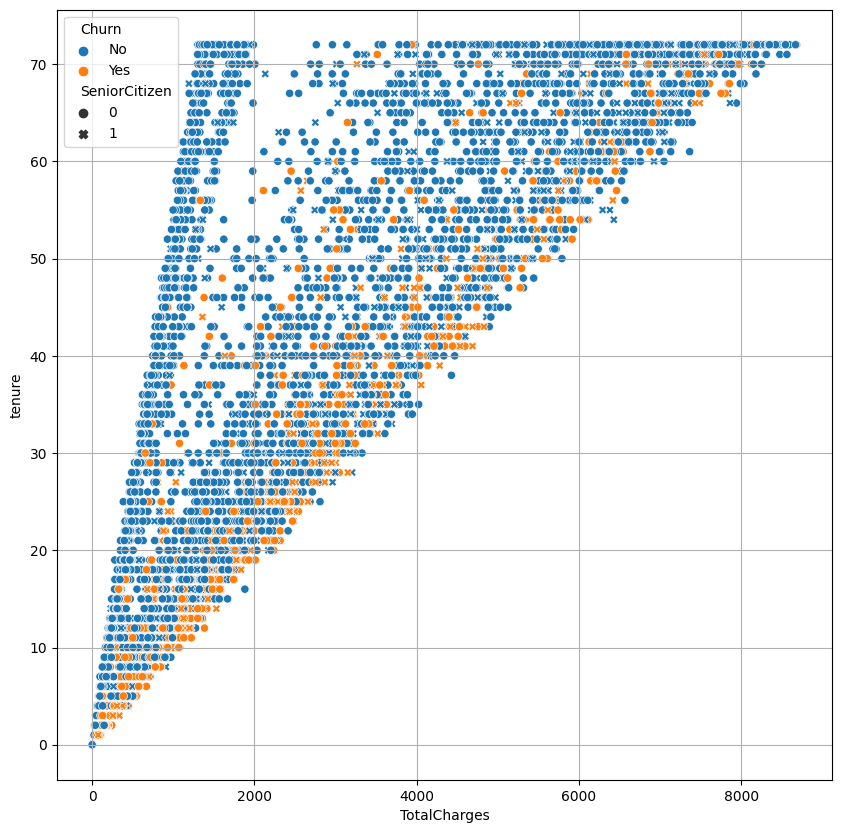

In [474]:
plt.figure(figsize=(10,10))
plt.grid('True')
sns.scatterplot(data=df,x='TotalCharges',y='tenure',hue='Churn',style='SeniorCitizen')

plt.show()

* people who are avaling phone service or phone service with  DSL - are staying in the system for longer time
* Within one year - density for leaving people are more and also they were using more services. 

In [ ]:
### Encoding Categorical Variables 
### Feature Scaling
### Feature Engineering
### Handling Imbalanced Data
### Dimensionality Reduction
### Feature Selection 
### Handling Multicollinearity

#Hypothesis testing 
#* We checked that people joining with two year contract  - getting less charges as compared to other contract 
# differnece in amount  - people who are joing with one year and two year 

In [478]:
# from pandas_profiling import ProfileReport
# profile=ProfileReport(df)
# profile.to_file("telecom_churn_pandas_profile_report.html")

## MonthlyCharges vs TotalCharges vs Churn

<AxesSubplot: xlabel='MonthlyCharges', ylabel='TotalCharges'>

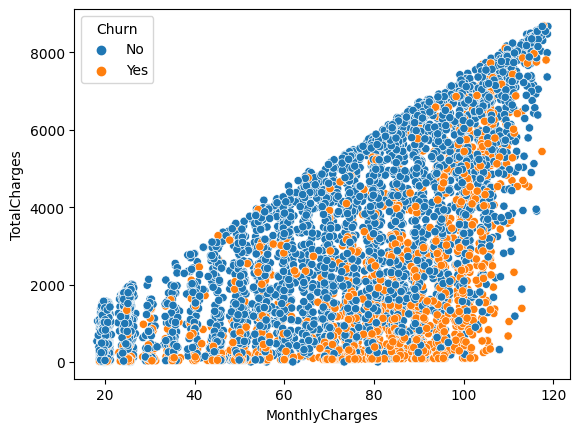

In [480]:
sns.scatterplot(data=df , x='MonthlyCharges', y='TotalCharges',hue='Churn')

* people having more monthly charges in the beginning are churn more and giving less busniess 

## Correlation calulculate using pandas profile b/w all type of variables

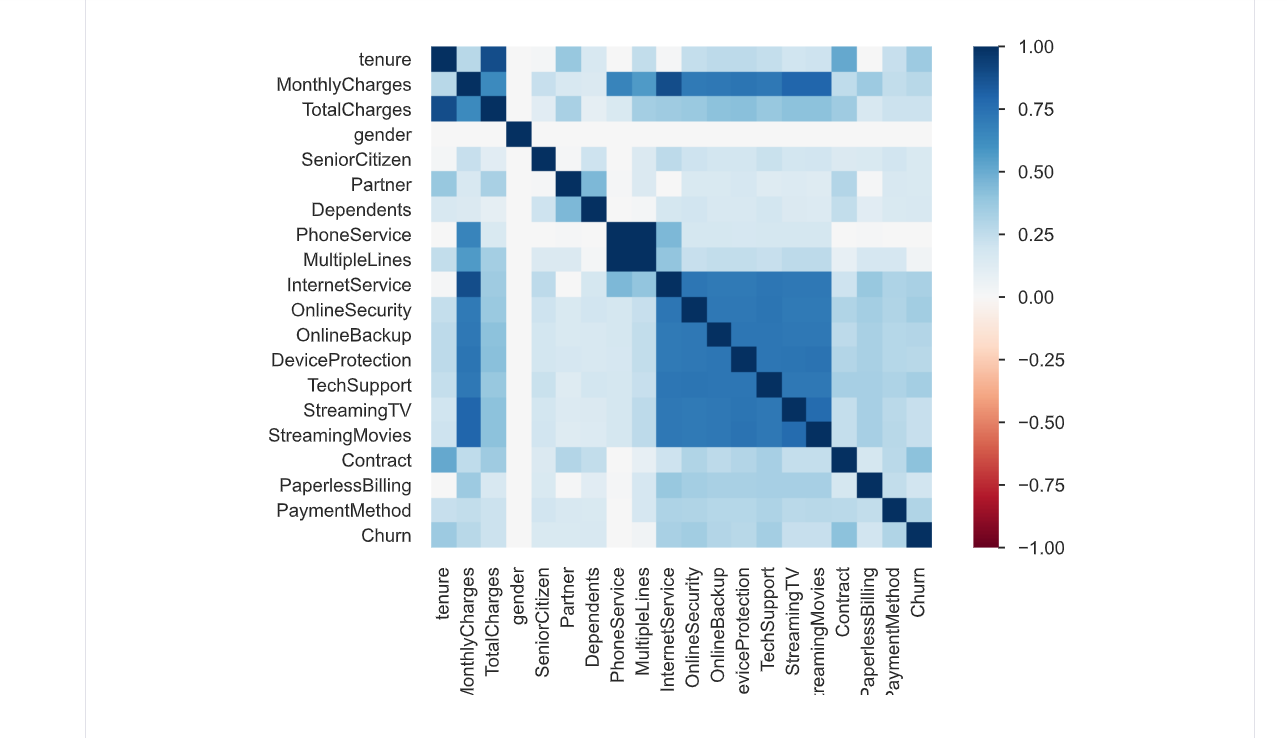

# Multicollinearity
* Internet service is very highly coreleated with monthly charges. i.e 0.886
* All these feature InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies are strongly dependent on each other  d also with montly charges 
* Contract is higly correlated with tenure
* tenure is highly correlated with total charges 
* This part need to be handled 



In [489]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [493]:
df.to_csv('df_part_1_completed.csv', index=False)
